## Método General de Transformada Inversa Continua
EL método de la trasformada inversa continua es una técnica para generar números aleatorios de cualquier distribución de probabilidad, para ello necesitamos que dicha distribución sea continúa, y que exista la inversa de su función de distribución en el intervalo de interés. El método general implica los siguientes pasos:


1. Generar un número aleatorio $U$ uniformemente distribuido en $(0,1)$, es decir $U\sim U(0,1)$.
2. Calcular el número aleatorio  $X$ utilizando $X = F^{-1}(U)$.


## Densidad Exponencial general de parámetro $\lambda$
La distribución exponencial de parámetro $\lambda$,tiene una funcion de densidad de probabilidad dada por:

$$
f(x) =
\begin{cases}
\frac{1}{\lambda}e^{-\frac{x}{\lambda}} & \text{si } x \geq 0 \\
0 & \text{otro caso }
\end{cases}
$$

O lo que es lo mismo

$$
f(x) = \frac{1}{\lambda}e^{-\frac{x}{\lambda}} I_{[0,\infty)}(x)
$$

donde $\lambda$ es el parámetro de escala de la distribución con $\lambda>0$, su valor esperado es $E(x) = \lambda$.

## Funcion de Distribución Exponencial general de parámetro $\lambda$
\begin{align*}
    F(x)&=\int_{-\infty}^{x} \frac{1}{\lambda}e^{-\frac{t}{\lambda}} I_{[0,\infty)}(t) \,dt\\
    &\overset{x\geq 0}{=} \frac{1}{\lambda} \int_{0}^{x} e^{-\frac{t}{\lambda}}  \,dt\\
&= \frac{1}{\lambda}\left[-\lambda e^{-\frac{t}{\lambda}}\middle |_{0}^{x}\right]\\
    &=-\left[e^{-\frac{x}{\lambda}}-(e^0)\right]\\
    &=1-e^{-\frac{x}{\lambda}}\\
\end{align*}
Por lo tanto su función de distribución general de parámetro $\lambda$, esta dado por $F(x)=1-e^{-\frac{x}{\lambda}}$

## Transformada Inversa para la Distribución Exponencial general de parámetro $\lambda$
Suponemos que $F(x)=y$, y despejamos para $x$
\begin{align*}
    y&=1-e^{-\frac{x}{\lambda}}\\
    y-1&=-e^{-\frac{x}{\lambda}}\\
    e^{-\frac{x}{\lambda}}&=1-y\\
    ln(e^{-\frac{x}{\lambda}})&=ln(1-y)\\
    -\frac{x}{\lambda}&=\text{ln}(1-y)\\
    x&=-\lambda ln(1-y) \\
    F^{-1}(x)&=-\lambda\text{ln}(1-x)\\
\end{align*}


Pero observemos que $F^{-1}(x)$ solo tiene sentido para $x \in (0,1)$(por la propia función y la definición de la distribución exponencial de parámetro $\lambda$, por lo que $F^{-1}(x)=-\lambda ln(1-x)I_{(0,1)}(x)$.

Finalmente, regresamos
$$
    X=-\lambda \text{ln}(1-U)\\
    X=-\lambda \text{ln}(U)
$$
donde $U \sim U(0,1)$ cual nos sirve para generar números aleatorios con una distribución exponencial de parámetro $\lambda$.


## Para implementarlo en Python
Importamos las librerias que utilizaremos

In [ ]:
import random as rnd #para generar números aleatorios distribuidos como U(0,1)
import numpy as np #para realizar operaciones numéricas
import matplotlib.pyplot as plt #para realizar gráficos cómo histogramas
import math #para usar constantes y operaciones matemáticas

definimos los parámetros de la distribución exponencial($\lambda$).

In [ ]:
n=10 #buscamos generar n números aleatorios
lamda= 2 #es el parámetro de la distribución exponencial que también es su media
L= -lamda #parámetro de apoyo

usamos un ciclo for para generar los números aleatorios con la distribución  exponencial($\lambda$).

In [ ]:
for i in range(n):
    u=rnd.random() #1 número aleatorio u distribuido como U(0,1) por cada ciclo
    x=L*np.log(u) #utiliza u para generar X con distribución exp(lambda)
    print(x) #imprimimos los números aleatorios generados

1.345614036585423
0.29558566505866735
2.4585287439408465
1.8657185061966317
0.3031640395416841
1.071161708366189
2.25654866768281
3.9962557630406885
4.680171305969595
5.529148537201897


Podemos definir una función para fusionar los dos pasos anteriores.

In [ ]:
def expo(lamda=1,n=10): #definimos una función para genear n números aleatorios
    lamda = 2
    L = -lamda
    lista=[] #lista para guardar los números aleatorios generados
    for i in range(n):
        u=rnd.random()
        x=  L*np.log(u)
        lista.append(x)
    return lista #regresa la lista de los números aleatorios que se generaron.

generamos una muestra de 50 números aleatorios con distribucion Exp(0.5)

In [ ]:
muestra=expo(0.5,5000) #se generaron n numeros aleatorios con distribucion exp(0.5)

Calculamos la media de la muestra generada y la imprimimos

In [ ]:
media=np.mean(muestra) #calculamos la media usando np
print(media)

2.0032069665604055


Calculamos la varianza de la muestra generada y la imprimimos

In [ ]:
varianza = np.var(muestra) #calculamos la varianza usando np
print(varianza)

3.873940627444283


Hacemos un histograma de frecuencias de la muestra generada.

(array([3.162e+03, 1.159e+03, 4.470e+02, 1.450e+02, 6.200e+01, 1.600e+01,
        5.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.67492491e-04, 2.01326233e+00, 4.02635716e+00, 6.03945199e+00,
        8.05254682e+00, 1.00656417e+01, 1.20787365e+01, 1.40918313e+01,
        1.61049262e+01, 1.81180210e+01, 2.01311158e+01]),
 <BarContainer object of 10 artists>)

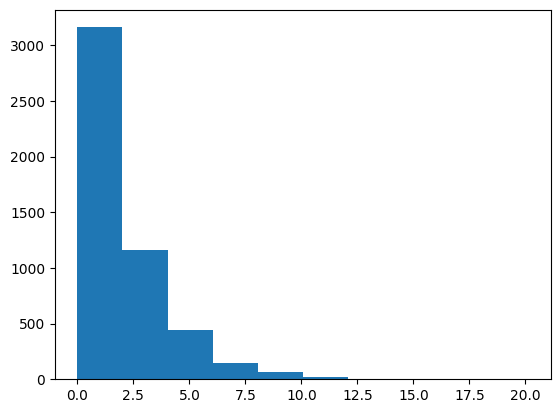

In [ ]:
plt.hist(muestra) #creamos un histograma de frecuencia de los numeros aleatorios generados

Ahora haremos la gráfica distribución acumulativa de la Exp($\lambda$)

In [ ]:
#Para hacer la distribución acumulativa
M=np.sort(muestra)  # Ordena los  elementos de la lista "muestra"

In [ ]:
def cdf(muestra):
    n=len(muestra) #Calcula la longitud de la muestra
    x=np.sort(muestra) # Ordena los  elementos de la lista "muestra"
    y=np.arange(0,n)/n #crea un arreglo de enteros de 0 a n-1, y luego lo divide por n
    #lo que normaliza los valores al rango [0, 1]
    return x,y #devuelve los valores de "x" y "y"

In [ ]:
print(cdf(muestra))

(array([1.67492491e-04, 1.29999843e-03, 1.58191793e-03, ...,
       1.55552339e+01, 1.58470389e+01, 2.01311158e+01]), array([0.000e+00, 2.000e-04, 4.000e-04, ..., 9.994e-01, 9.996e-01,
       9.998e-01]))


In [ ]:
x_math,y_math=cdf(muestra) #asignamos "x" y "y" que retornamos de la funcion cdf a las variables "x_math" y "y_math"

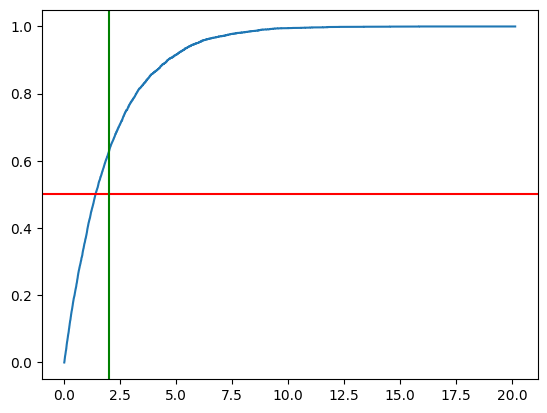

In [ ]:
plt.step(x_math,y_math) #ploteamos x_math contra y_math para representar F(x) de la distribución exponencial(lambda)
plt.axhline(y=0.5, color='red') #La mediana
plt.axvline(x=media,color='green') #La media

## Densidad

$$
f(x) =
\begin{cases}
\frac{e^{x}}{e-1}& \text{si } x \leq 0 \leq 1 \\
0 & \text{otro caso }
\end{cases}
$$

O lo que es lo mismo

$$
f(x) = \frac{e^{x}}{e-1} I_{[0,1]}(x)
$$


## Funcion de Distribución
\begin{align*}
    F(x)&=\int_{-\infty}^{x} \frac{e^{t}}{e-1} I_{[0,1]}(t) \,dt\\
    &\overset{x\geq 0}{=} \frac{1}{e-1} \int_{0}^{x} e^{t}  \,dt\\
&= \frac{1}{e-1}\left[ e^{t}\middle |_{0}^{x}\right]\\
    &=\frac{1}{e-1}(e^x-1)\\
\end{align*}
Por lo tanto  $F(x)=\frac{e^x-1}{e-1}$

## Transformada Inversa
Suponemos que $F(x)=y$, y despejamos para $x$
\begin{align*}
    y&=\frac{e^x-1}{e-1}\\
    y(e-1)&=e^x-1\\
    e^x&=y(e-1)+1\\
    x&=\text{ln}(y(e-1)+1)\\
    F^{-1}(x)&=\text{ln}(x(e-1)+1)\\
\end{align*}

Finalmente, regresamos
$$
    X=\text{ln}(U(e-1)+1)
$$
donde $U \sim U(0,1)$ cual nos sirve para generar números aleatorios con una distribución $f(x) = \frac{e^{x}}{e-1} I_{[0,1]}(x)$


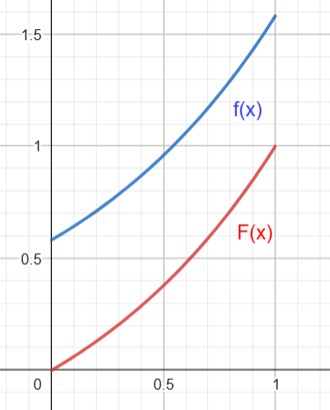

In [ ]:
def dist(n=10): #definimos una función para genear n números aleatorios
    lista=[] #lista para guardar los números aleatorios generados
    for i in range(n):
        u=rnd.random()
        x=  np.log(u*(math.e-1)+1)
        lista.append(x)
    return lista #regresa la lista de los números aleatorios que se generaron.

In [ ]:
muestra2=dist(5000)
media2=np.mean(muestra2) #calculamos la media usando np
print(media2)
varianza2 = np.var(muestra2) #calculamos la varianza usando np
print(varianza2)

0.5809471475919346
0.08105208646820766


(array([326., 354., 360., 420., 435., 491., 532., 623., 693., 766.]),
 array([8.93134328e-06, 9.99750035e-02, 1.99941076e-01, 2.99907148e-01,
        3.99873220e-01, 4.99839292e-01, 5.99805364e-01, 6.99771437e-01,
        7.99737509e-01, 8.99703581e-01, 9.99669653e-01]),
 <BarContainer object of 10 artists>)

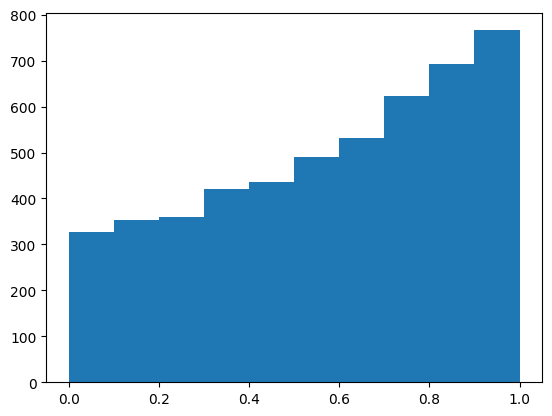

In [ ]:
plt.hist(muestra2) #creamos un histograma de frecuencia de los numeros aleatorios generados

In [ ]:
x2_math,y2_math=cdf(muestra2) #asignamos "x" y "y" que retornamos de la funcion cdf a las variables "x_math" y "y_math"

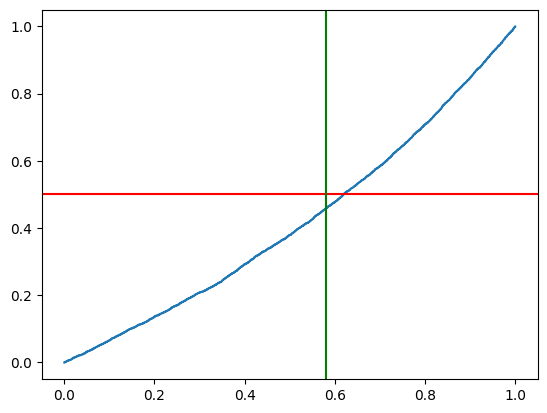

In [ ]:
plt.step(x2_math,y2_math) #ploteamos x_math contra y_math para representar F(x) de la distribución exponencial(lambda)
plt.axhline(y=0.5, color='red') #La mediana
plt.axvline(x=media2,color='green') #La media